In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage.io import imread
from skimage.transform import rescale, resize
from tqdm import tqdm

# Analyse Histogramme de Gradients Orientés

##### Chargement du nom des images

In [10]:
sea_images = []
other_images = []
    
for file in os.listdir("./Data/Mer"):
    sea_images.append('./Data/Mer/' + file)
    
for file in os.listdir("./Data/Ailleurs"):
    other_images.append("./Data/Ailleurs/" + file)

##### Fonction permettant d'extraire le HOG

In [11]:
def get_hog(filename, visualize=False):
    image = imread(filename, as_gray=True)
    image = resize(image, (1200, 1200))
    image = rescale(image, 1/3, mode='reflect')
    return hog(image, orientations=16, pixels_per_cell=(16,16),
                    cells_per_block=(1,1), visualize=visualize, feature_vector=True, block_norm='L2')

## Comparaison HOG d'une image de mer et d'une image d'ailleurs

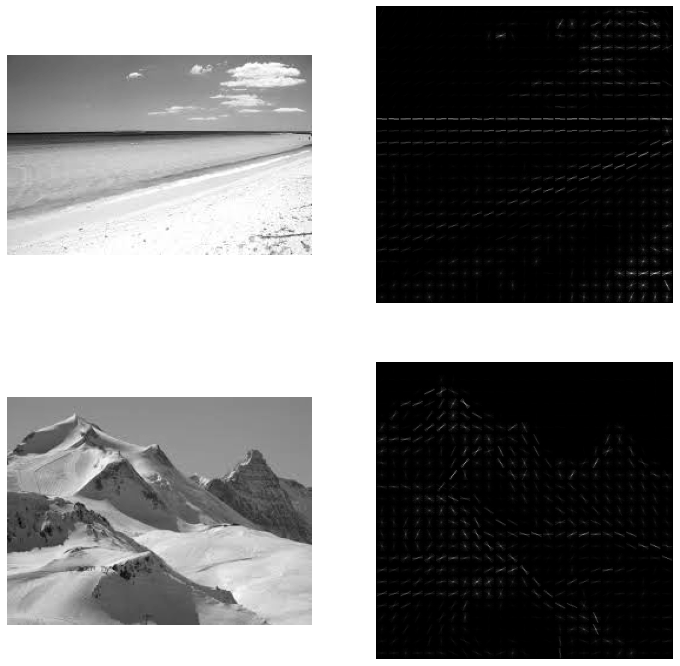

In [12]:
index = 130 # Index à modifier pour comparer d'autres images

sea_image = imread(sea_images[index], as_gray=True)
sea_hog, sea_visu = get_hog(sea_images[index], True)

other_image = imread(other_images[index], as_gray=True)
other_hog, other_visu = get_hog(other_images[index], True)

fig, ax = plt.subplots(2,2)
fig.set_size_inches(12,12)

# Mer
ax[0][0].axis('off')
ax[0][0].imshow(sea_image, cmap='gray')
ax[0][1].axis('off')
ax[0][1].imshow(sea_visu, cmap='gray')

# Ailleurs
ax[1][0].axis('off')
ax[1][0].imshow(other_image, cmap='gray')
ax[1][1].axis('off')
ax[1][1].imshow(other_visu, cmap='gray')
plt.show()

On remarque que les HOGs pourraient jouer un rôle dans l'identification des lignes d'horizon et des côtes tout en écartant les images contenant d'importants reliefs

## Préparation des données

In [13]:
X = []
y = []

for file in tqdm(os.listdir("./Data/Ailleurs")):
    X.append(get_hog('./Data/Ailleurs/' + file))
    y.append(0)
    
for file in tqdm(os.listdir("./Data/Mer")):
    X.append(get_hog('./Data/Mer/' + file))
    y.append(1)

100%|██████████| 246/246 [00:30<00:00,  8.06it/s]


## Apprentissage

In [14]:
def plot_results(clf_scores):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))
    fig.suptitle('Résultats')
    ax1.hist(clf_scores)
    ax2.boxplot(clf_scores)

    print("Moyenne : " + str(np.mean(clf_scores))+  ", Variance : " + str(np.var(clf_scores)) + ", Écart-type : " + str(np.std(clf_scores)))

100%|██████████| 100/100 [02:04<00:00,  1.24s/it]

Moyenne : 0.7453535353535355, Variance : 0.0015167737985919806, Écart-type : 0.0389457802411504


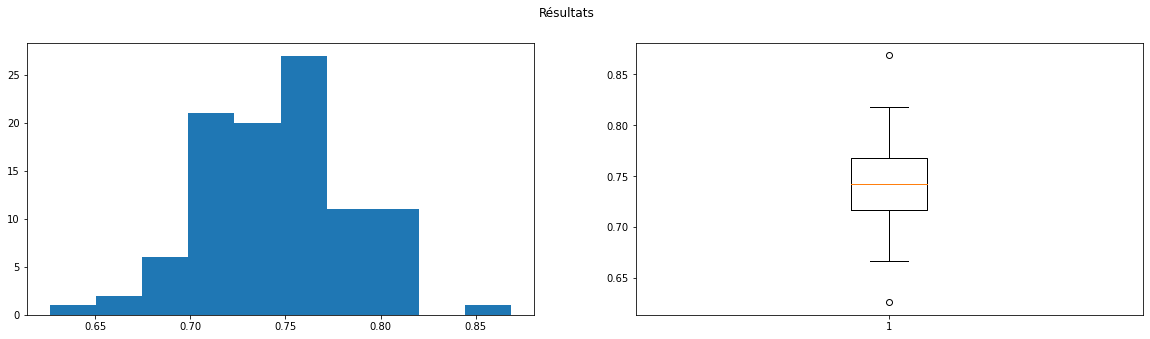

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifieur = SVC(gamma='auto')

nb_runs = 100
clf_scores = []
for i in tqdm(range(nb_runs)):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
    classifieur.fit(X_train, y_train)
    y_predits = classifieur.predict(X_test)
    clf_scores.append(accuracy_score(y_test, y_predits))
plot_results(clf_scores)

## Export

In [16]:
classifieur.fit(X, y)
from joblib import dump
dump(classifieur, 'hog.joblib');

In [ ]:
#code hello world 
#print hello world
print("Hello World")
#print something
print("Hello World")
#print sum of two numbers x and y
x = 10  # x is a variable
y = 20  # y is a variable
print(x+y)
print(1+2)
#print average of two numbers x and y
x = 10  # x is a variable
y = 20  # y is a variable
print((x+y)/2)
#print an email 
#print average of array
x = [1,2,3,4,5]
print(sum(x)/len(x))
    

